# My First Neural Network Notebook: "And" Gate Prediction

This is my first Jupyter Notebook for my exploation in Neural Network. In this notebook I will use the TensorFlow architecture to build a neural network which resembles an "And" logic gate. 

Written by Shing Chi Leung at 29 January 2021

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


# A short excursion to the OS functionality of Google Drive

In [ ]:
myfile = open("gdrive/MyDrive/Colab Notebooks/hello.txt")
print(myfile.read())

hello


In [ ]:
!ls

gdrive	sample_data


In [ ]:
!pip install numpy

# 1. Neural Network Construction and Compilation

I build a simple fully connected network with only 10 neurons in one layers, with a total of 3 hidden layers. I also build the necessary function which can compile, train and test the neural network. I find that this structure is useful for me to reuse the code in the future. 

In [ ]:
def build_model(input_shape):

  model = tf.keras.models.Sequential()

  model.add(Dense(10, activation="relu", input_shape=input_shape))
  model.add(Dense(10, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))
  return model

In [ ]:
def test_model(model, x_test, y_test):
  test_loss, test_acc = model.evaluate(x_test, y_test)
  return (test_loss, test_acc)

In [ ]:
def train_model(model, x_train, y_train):
  history = model.fit(x_train, y_train, epochs=100, verbose=0, batch_size=64)
  return history

In [ ]:
def compile_model(model):
  #model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")
  model.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError(), metrics="accuracy")

In [ ]:
def predict_model(model, x_test):
  y_test = model.predict(x_test, batch_size=64, verbose=0)
  return y_test

# 2. Data Construction

Although formally logic gate only accepts two types of input, "1" and "0" as a resemble to the electric current, if we use only "1" and "0" as the training data, the model will easily confuse as the symmetry in the parameter space is not broken. Therefore, we assume the input is a continuous variable of (0,1), with value > 0.5 being classified as "On" (< 0.5 as "Off"). With this assumption, we can use random number generator to create a lot of random samples that help the network to classify.

In [ ]:
# build the dataset for and_gate

from random import random

def and_gate(x):
  if x[0] > 0.5 and x[1] > 0.5:
    return 1
  else:
    return 0

x_train = np.array([[random(), random()] for i in range(1000)])
y_train = np.array([and_gate(x) for x in x_train])

x_test = np.array([[random(), random()] for i in range(100)])
y_test = np.array([and_gate(x) for x in x_test])

print(x_train[0], y_train[0])

[0.8615397  0.22403206] 0


It is always educational to plot the data for an impression whether we prepare the data correctly.

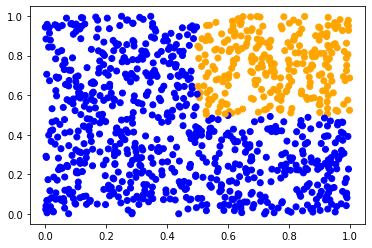

In [ ]:
import matplotlib.pyplot as plt

colour = ["blue", "orange"]
colour_set = [colour[i] for i in y_train]
plt.scatter(x_train[:,0], x_train[:,1], c=colour_set)

Indeed, the random number generator allows us to create a parameter space where the "And"-gate can be resembled with.

# 3. Model training and testing

In [ ]:
model = build_model(x_train[0].shape)
model.summary()

compile_model(model)
history = train_model(model, x_train, y_train)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history.history["accuracy"][-1]

0.9829999804496765

We can examine the stucture of the neural network if we need to do diagnoistic treatment. 

In [ ]:
model.weights

[<tf.Variable 'dense_21/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[ 0.83999103, -0.28854007, -0.50831574],
        [ 0.4125241 , -0.24359351,  0.59197325]], dtype=float32)>,
 <tf.Variable 'dense_21/bias:0' shape=(3,) dtype=float32, numpy=array([ 5.9677113e-06,  0.0000000e+00, -9.9164136e-03], dtype=float32)>,
 <tf.Variable 'dense_22/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[ 0.2986853 ],
        [ 0.4357201 ],
        [-0.05905027]], dtype=float32)>,
 <tf.Variable 'dense_22/bias:0' shape=(1,) dtype=float32, numpy=array([3.1698146e-05], dtype=float32)>]

In [ ]:
test_loss, test_acc = test_model(model, x_test, y_test)
print(test_loss, test_acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9800
0.028624067083001137 0.9800000190734863


# 4. Data Prediction with the trained neural network

Finally we can use the trained network to do the prediction. We wish that the network can reproduce as much as it can the original given data. 

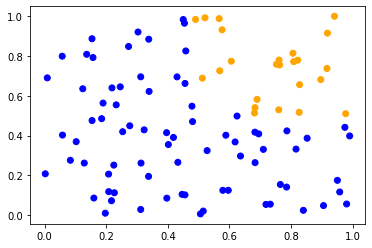

In [ ]:
y_pred = predict_model(model, x_test)

def classifer(x):
  if x > 0.5:
    return 1
  else:
    return 0

y_class = [classifer(i) for i in y_pred]
colour_test_set = [colour[i] for i in y_class]
plt.scatter(x_test[:,0], x_test[:,1], c=colour_test_set)

The prediction is very similar to what we produced above. This shows that the neural network can really reproduce what an "And" gate is doing. 